In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    #Lx_terr = np.sqrt((1+2*np.array(Lx_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
CorrData = pickle.load(open('1DcorrData.p', 'rb'))
possibleScales = CorrData['possibleScales']; temperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
LcorrNEGdata = CorrData['LcorrNEGdata']; LtauNEGdata = CorrData['LtauNEGdata']
LcorrEnw_data = CorrData['LcorrEnw_data']; LtauEnw_data = CorrData['LtauEnw_data']
Lcorr_neg_data = CorrData['Lcorr_neg_data']; Ltau_neg_data = CorrData['Ltau_neg_data']
Lcorr_nwe_data = CorrData['Lcorr_nwe_data']; Ltau_nwe_data = CorrData['Ltau_nwe_data']

In [4]:
tauData = [['','MAXtauE', 'MAXtauM', 'MAXtauNEG', 'MAXtauEnw']]

for i,L in enumerate(possibleScales):
    row = []
    tauE = round(np.nanmax(LtauEdata[i]),3); tauM = round(np.nanmax(LtauMdata[i]),3)
    tauNEG = round(np.nanmax(LtauNEGdata[i]),3); tauEnw = round(np.nanmax(LtauEnw_data[i]),3)
    j = np.nanargmax(LtauEdata[i]); k = np.nanargmax(LtauMdata[i])
    m = np.nanargmax(LtauNEGdata[i]); n = np.nanargmax(LtauEnw_data[i])
    T1 = temperatures[j]; T2 = temperatures[k]; T3 = temperatures[m]; T4 = temperatures[n]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauE,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    row.append('%.1f (T=%.2f)'%(tauNEG,T3)); row.append('%.1f (T=%.2f)'%(tauEnw,T4))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData))))

tau_negData = [['','MAXtau_neg0', 'MAXtau_neg1', 'Maxtau_neg2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_neg_ls = np.nanmax(Ltau_neg_data[i],axis=0); qs = np.nanargmax(Ltau_neg_data[i],axis=0)
    for tau_neg_l,q in zip(tau_neg_ls,qs):
        T5 = temperatures[q]; row.append('%.1f (T=%.2f)'%(tau_neg_l,T5))
    tau_negData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_negData))))

tau_nweData = [['','MAXtau_nwe0', 'MAXtau_nwe1', 'Maxtau_nwe2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_nwe_ls = np.nanmax(Ltau_nwe_data[i],axis=0); rs = np.nanargmax(Ltau_nwe_data[i],axis=0)
    for tau_nwe_l,r in zip(tau_nwe_ls,rs):
        T6 = temperatures[r]; row.append('%.1f (T=%.2f)'%(tau_nwe_l,T6))
    tau_nweData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_nweData))))

,MAXtauE,MAXtauM,MAXtauNEG,MAXtauEnw
L = 64,19.2 (T=1.63),7.5 (T=6.13),15.7 (T=5.37),15.7 (T=5.37)
L = 256,55.7 (T=1.63),29.2 (T=6.13),35.6 (T=2.77),35.6 (T=2.77)
L = 1024,172.9 (T=7.01),49.8 (T=7.01),125.8 (T=6.13),125.8 (T=6.13)


L = 256


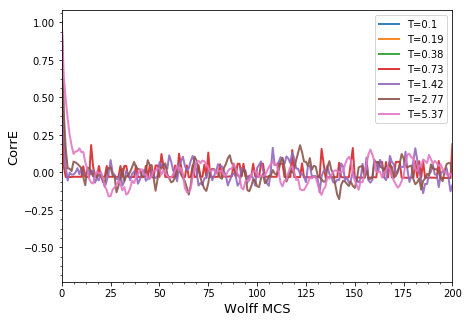

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 1 # index of scales
k = 0 # index of temperature
step = 5

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrEdata[i][j+step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=13); ax1.set_ylabel('CorrE', fontsize=13)
ax1.legend()
ax1.set_xlim([0,200])
ax1.minorticks_on()

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])

if save:
    plt.savefig('RG1DcorrE_vs_t')

# Energy function

In [6]:
Ldata = pickle.load(open('1Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; L_CvEdata = Ldata['L_CvEdata']
L_NEGdata = Ldata['L_NEGdata']; L_NEGerr = Ldata['L_NEGerr']; L_CvNEGdata = Ldata['L_CvNEGdata']
Len_nw_data = Ldata['Len_nw_data']; Len_nw_err = Ldata['Len_nw_err']; L_CvEnw_data = Ldata['L_CvEnw_data']
Lneg_data = Ldata['Lneg_data']; Lneg_err = Ldata['Lneg_err']; L_Cv_neg_data = Ldata['L_Cv_neg_data']
Lnwe_data = Ldata['Lnwe_data']; Lnwe_err = Ldata['Lnwe_err']; L_Cv_nwe_data = Ldata['L_Cv_nwe_data']
temperatures = Ldata['temperatures']; scales = Ldata['scales']; t_prod = Ldata['t_prod']

#Lnng_data = np.array(Lnng_data); substract = np.array(scales)
#substract = substract[:,np.newaxis]
#substract = tile(substract, (1,Lnng_data.shape[1]))

#Lnng_data = (Lnng_data-substract)/substract
print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
Len_terr = uncorr_err(Len_err, LtauEdata); L_NEGterr = uncorr_err(L_NEGerr, LtauNEGdata)
Len_nw_terr = uncorr_err(Len_nw_err, LtauEnw_data)
print(Len_terr)
print(L_NEGterr)

[[  0.           0.           0.           0.           0.
    0.           0.           1.56122353   2.86275935   4.05121771
    5.81993285   7.71918913   9.44690473  10.51134588  11.42111497
   12.33561669  13.23542126  14.14288151  14.76041813  15.26019391
   15.82654528  16.10609979  16.45802301  16.69678639  16.92325632
   16.89425817  17.23594619  17.58648416  17.72985987  17.74119127
   17.50799639  18.0953542   17.66492075  17.59900982]
 [  0.           0.           0.           0.           0.
    0.           2.9990798    5.19039627   8.81438818  13.11438367
   16.65095059  18.94757764  21.48834686  24.3227454   26.87115239
   29.52268225  32.3062601   34.05462659  34.86617129  36.60987684
   38.58843907  38.79448525  39.51171941  40.82884103  41.34947017
   40.96269621  41.37847786  41.54069411  41.96134867  41.05308794
   42.44932529  42.89549884  42.01433539  43.75784237]
 [  0.           0.           0.           0.           0.
    5.51256834  11.23966369  18.9524362   2

In [8]:
print(len(Len_data[0]))

34


##### Finite size scaling 

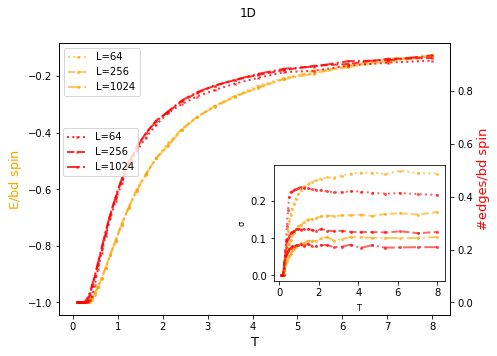

In [9]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E}$/bd spin', fontsize=13, color='orange')
ax2.set_ylabel('#edges/bd spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.55, 0.22, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax2.plot(temperatures, (L_NEGdata[i])/(L), marker='x',markersize=2, alpha=0.8, label='L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, L_NEGterr[i]/(L),  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    #if i==i or i==i:
        #ax1.errorbar(temperatures, Len_data[i]/L, yerr=Len_terr[i]/L, alpha=0.2, color='orange', linestyle='')
        #ax2.errorbar(temperatures, Lnng_data[i]/L, yerr=Lnng_err[i]/L, alpha=0.2, color='r', linestyle='')
    
ax1.legend(loc='upper left'); 
ax2.legend(loc=(0.01,0.51))
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('RG1D_L_E_NEG_vs_T')

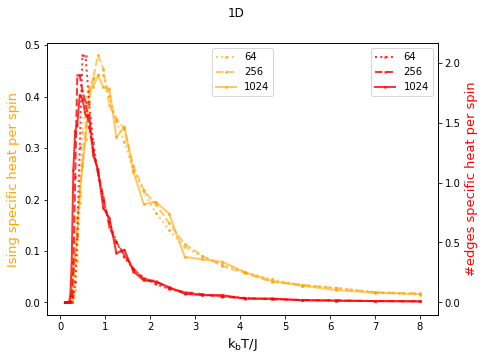

In [10]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Ising specific heat per spin', fontsize=13, color='orange')
ax12.set_ylabel('#edges specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/L, marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange',
            linestyle=ls[i], linewidth=2)
    ax12.plot(temperatures, L_CvNEGdata[i]/L, marker='x',markersize=2, alpha=0.8, label='%d'%(L), color='r',
            linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper center')
ax12.legend()

if save:
    plt.savefig('RG1D_L_CvE_CvNEG_vs_T')

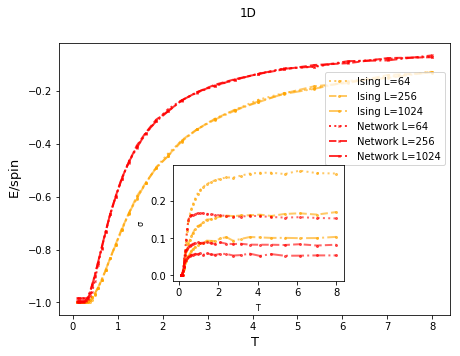

In [11]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E}$/spin', fontsize=13, color='black')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.35, 0.22, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

geom = 2

for i,L in enumerate(scales[0:]):
    
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=2, alpha=0.6, label='Ising L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='Ising L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    #if i==i or i==i:
        #ax1.errorbar(temperatures, Len_data[i]/L, yerr=Len_terr[i]/L, alpha=0.2, color='orange', linestyle='')
        #ax2.errorbar(temperatures, Lnng_data[i]/L, yerr=Lnng_err[i]/L, alpha=0.2, color='r', linestyle='')
for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, (Len_nw_data[i])/(geom*L), marker='x',markersize=2, alpha=0.8, label='Network L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_nw_terr[i]/(geom*L),  marker='o', markersize=2, alpha=0.6, label='Network L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=(0.68,0.55)); 
#ax2.legend(loc=(0.01,0.51))
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('RG1D_L_E_Len_nw_vs_T')

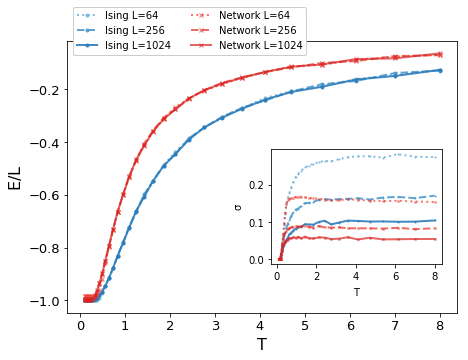

In [12]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E/L}$', fontsize=16)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.26, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)

geom = 2

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=3, alpha=0.9, label='Ising L=%d'%(L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_data[i][i:]/L, yerr=Len_terr[i][i:]/L, alpha=0.5, color=cm.winter(i*100), linestyle='', 
                 #errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/L,  marker='o', markersize=1, alpha=0.9, label='L=%d'%(L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, Len_nw_data[i]/(geom*L), marker='x',markersize=4, alpha=0.7, label='Network L=%d'%(L), 
             color=cm.Reds(160+i*10), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_nw_data[i][i:]/L, yerr=Len_nw_terr[i][i:]/L, alpha=0.5, color=cm.autumn(i*60), 
                 #linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, Len_nw_terr[i]/(geom*L),  marker='x', markersize=2, alpha=0.7, label='L=%d'%(L), 
             color=cm.Reds(160+i*10), linestyle=ls[i], linewidth=2)

ax1.legend(loc=(0.015,0.95), ncol=2, framealpha=1)
#ax1.legend(loc=[1.01,0.55]); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('RG1D_L_E_Enw_vs_T')

In [13]:
LrEnwE = (np.array(Len_nw_data))/(np.array(Len_data))
print(LrEnwE)

[[1.96875    1.96875    1.96875    1.96875    1.96875    1.96875
  1.96875    1.96869953 1.96819709 1.96659954 1.95937813 1.93734595
  1.88585701 1.81340492 1.73959824 1.67080653 1.6007283  1.53567051
  1.46963628 1.4073884  1.35981767 1.31604929 1.27840176 1.22907085
  1.2061851  1.19199896 1.18641789 1.15457169 1.15805497 1.10129581
  1.13667435 1.09551135 1.05992215 1.10147908]
 [1.9921875  1.9921875  1.9921875  1.9921875  1.9921875  1.9921875
  1.99215308 1.99190579 1.98979202 1.97947264 1.95149896 1.9070396
  1.85785623 1.79871416 1.73693889 1.66949488 1.59875489 1.53372831
  1.46986055 1.41523443 1.35902685 1.30506009 1.25825637 1.23917146
  1.21846656 1.18512228 1.15251632 1.14563423 1.11556977 1.12377043
  1.11224037 1.11191892 1.07486198 1.1027325 ]
 [1.99804688 1.99804688 1.99804688 1.99804688 1.99804688 1.99803297
  1.9978193  1.99613379 1.98745444 1.96825228 1.94303255 1.90498013
  1.85812814 1.79851326 1.73392047 1.66539216 1.59758001 1.53412163
  1.46892747 1.41380654 1.3

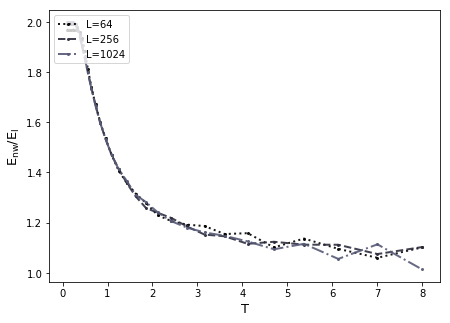

In [14]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E_{nw}/E_I}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrEnwE[i], marker='o', markersize=2, alpha=0.9, label='L=%d'%(L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

    
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('RG1D_LrEnwE_vs_T')

##### Largest scale 

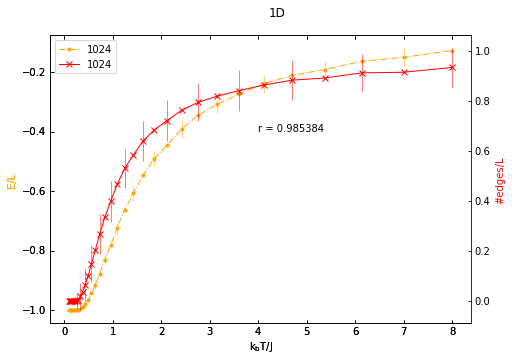

In [15]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5)); fig.suptitle('1D')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

#offset = (60, 0)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("E/L", fontsize=13)
par1.set_ylabel("#edges/L")

p1, = host.plot(temperatures, Len_data[Lidx]/L, label="%d"%(L), marker='o', markersize=3, color='orange', linestyle='-.', 
                linewidth=1)
p2, = par1.plot(temperatures, L_NEGdata[Lidx]/L, label="%d"%(L), marker='x', markersize=6, color='r', linewidth=1)

p1err = host.errorbar(temperatures, Len_data[Lidx]/L, yerr=Len_err[Lidx]/L, fmt='none', color=p1.get_color(), elinewidth=0.5, 
                      errorevery=2)
p2err = par1.errorbar(temperatures[1:], L_NEGdata[Lidx][1:]/L, yerr=L_NEGterr[Lidx][1:]/L, fmt='none', color=p2.get_color(), 
                      elinewidth=0.5, errorevery=2)

#par1.set_ylim(0, 4)
host.legend()
r = np.corrcoef(Len_data[Lidx], L_NEGdata[Lidx])[0,1]
host.annotate('r = %.6f'%(r), (4,-0.4))

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

if save:
    plt.savefig('RG1D_E_NEG_vs_T_L=%d'%(L))

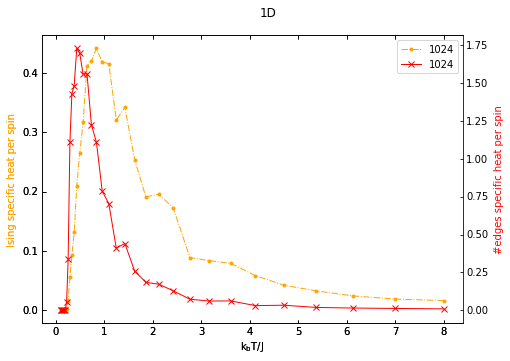

In [16]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5)); fig.suptitle('1D')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (60, 0)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("Ising specific heat per spin", fontsize=13)
par1.set_ylabel("#edges specific heat per spin")

p1, = host.plot(temperatures, L_CvEdata[Lidx]/L, label="%d"%(L), marker='o', markersize=3, color='orange', linestyle='-.', 
                linewidth=1)
p2, = par1.plot(temperatures, L_CvNEGdata[Lidx]/L, label="%d"%(L), marker='x', markersize=6, color='r', linewidth=1)

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

if save:
    plt.savefig('RG1D_CvE_CvNEG_vs_T_L=%d'%(L))

##### RG energy~inner edges

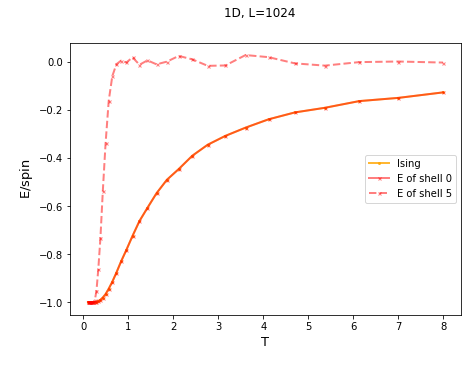

In [17]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D, L=%d'%(L))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='black')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/L, marker='o', markersize=2, alpha=0.8, label='Ising', color='orange', 
             linestyle=ls[0], linewidth=2)
for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], marker='x', markersize=3, alpha=0.5, label='E of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('RG1D_Enwe_vs_T_L=%d'%(L))

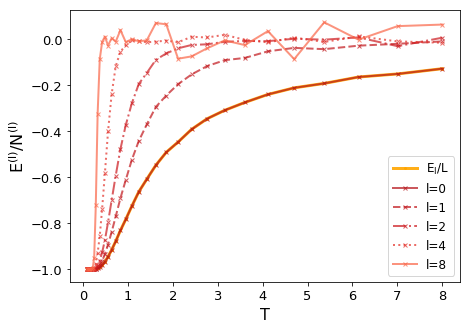

In [18]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
show_shells = [0,1,2,4,8]

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D, L=%d'%(L))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E^{(l)}/N^{(l)}}$', fontsize=16, color='black')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/L, marker='o', markersize=2, alpha=0.9, color='orange', label='$\mathrm{E_I/L}$',
             linestyle=ls[0], linewidth=3)
for i in show_shells:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], marker='x', markersize=4, alpha=0.7, label='l=%d'%(i), 
             color=cm.Reds(210-i*10), linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax1.errorbar(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], yerr=Lnwe_err[Lidx][:,i]/n_l[i], alpha=0.5, color=cm.Reds(210-i*10), 
                 #linestyle='', capsize=3, errorevery=i+1)
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='lower right', prop={"size":12}); 
#ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('RG1D_Enwe_vs_T_L=%d'%(L))

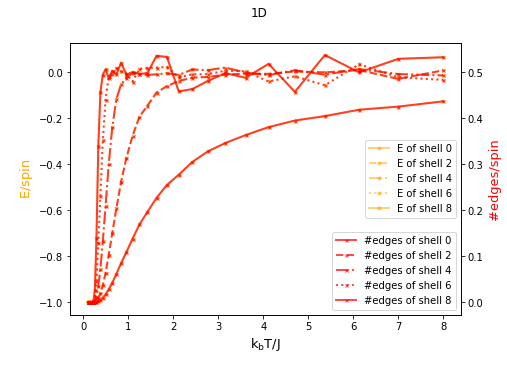

In [19]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
step = 2

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ax2.set_ylabel('#edges/spin', fontsize=13, color='r')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], marker='o', markersize=3, alpha=0.5, label='E of shell %d'%(i), 
             color='orange', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, Lneg_data[Lidx][:,i]/n_l[i], marker='x',markersize=3, alpha=0.7, label='#edges of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax2.legend(loc='lower right')
ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('RG1D_nwe_neg_vs_T_L=%d'%(L))

##### Magnetization 

In [20]:
Ldata_mag = pickle.load(open('1Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
temperatures = Ldata_mag['temperatures']; scales = Ldata_mag['scales']; t_prod = Ldata_mag['t_prod']
print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


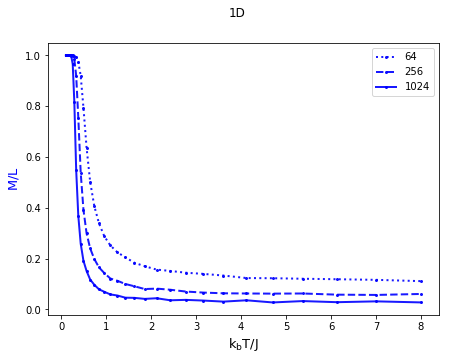

In [21]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L}$', fontsize=13, color='b')
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='%d'%(L), 
             color='b', linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('RG1D_L_M_vs_T')

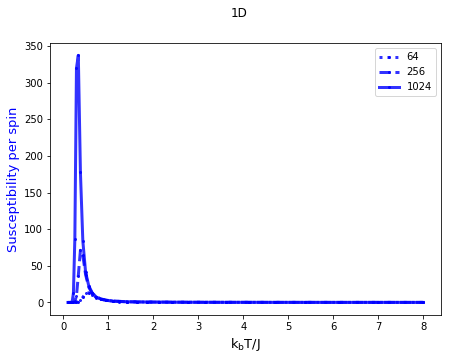

In [22]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13, color='b')
ls = [':', '--', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='%d'%(L), color='b', linestyle=ls[i], 
              linewidth=3)

ax11.legend()

if save:
    plt.savefig('RG1Dsusc_vs_T')

# Free energy

In [23]:
Lf_data = pickle.load(open('1Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = Lf_data['f_exact']; Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']
Len_err = Lf_data['Len_err']; Len_hist_data = Lf_data['Len_hist_data']; Len_bin_edges_data = Lf_data['Len_bin_edges_data']
temperatures = Lf_data['temperatures']; scales= Lf_data['scales']; t_prod = Lf_data['t_prod'] 
print('results were gathered from the following number of sampled configurations:', t_prod)

results were gathered from the following number of sampled configurations: 40000


In [24]:
Len_fr_err = []

for i,L in enumerate(scales):
    e = abs(Len_fr[i]/L-f_exact)
    Len_fr_err.append(e)

##### Energy histograms 

In [25]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    #print(h1)
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/L, h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/L, h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/L, h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/L, h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

Scale=64


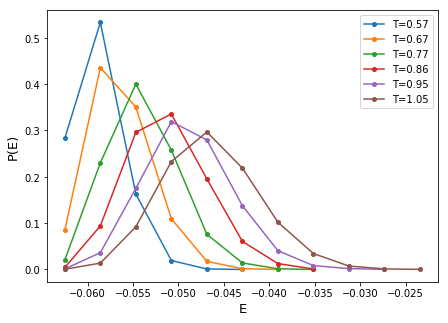

In [26]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('E', fontsize=13)
ax5.set_ylabel('P(E)', fontsize=13)

idx = 0
print('Scale=%d'%(scales[idx]))
l = 5
k = 10
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_bin_edges_data[idx][l+i]/(L), Len_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, linestyle='-', 
             marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('RG1Den_hist_%d_%d'%(l,k))

In [27]:
print('Scale=%d'%(scales[idx]))
wg.interact(check_visual, hists=wg.fixed(Len_hist_data[idx]), bins=wg.fixed(Len_bin_edges_data[idx]), i=(0,len(temperatures)-2))

Scale=64


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'…

<function __main__.check_visual(i, hists, bins)>

##### Free energy finite size scaling 

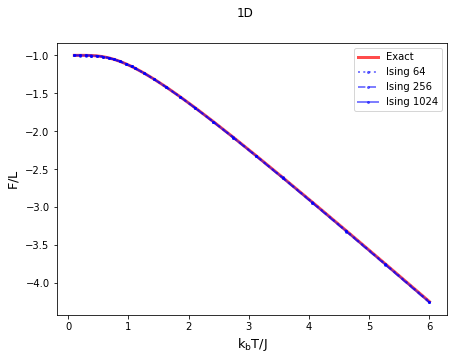

In [28]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{F/L}$', fontsize=13)
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=0.7, label='Exact', color='r', linewidth=3)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

ax1.legend()

if save:
    plt.savefig('RG1D_Len_fr_vs_T')

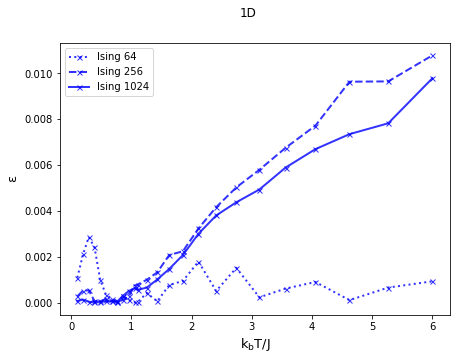

In [29]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

for i,L in enumerate(scales):
    #ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
    #         linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax1.plot(temperatures, Len_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Ising %d'%(L), color='b', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('RG1D_Len_fr_err_vs_T')

Entropy:

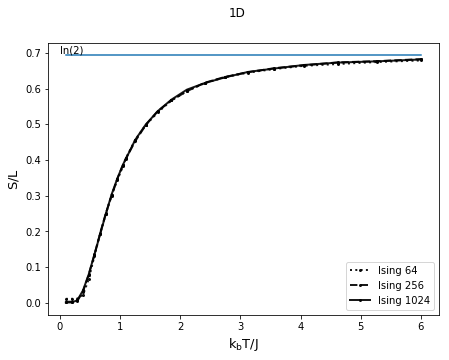

In [30]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{S/L}$', fontsize=13)
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))

for i,L in enumerate(scales):
    ax1.plot(temperatures, LenS[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='black')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('RG1D_LenS_vs_T')